+++
date = '2025-01-27T14:41:41Z'
draft = true
title = 'SVM Support Vector Machine an introduction'
+++

### Summary

In this post I will implement a Support Vector Machine (SVM) in python. Then describe what it doe how it does it and some applications of the instrument. 

### Blog Post: An Introduction to Support Vector Machines for Python Developers

---

#### **What Are Support Vector Machines (SVM)?**

Support Vector Machines (SVM) are powerful supervised learning algorithms used for classification and regression tasks. Their strength lies in handling both linear and non-linear problems effectively. By finding the optimal hyperplane that separates classes, SVMs maximize the margin between data points of different classes, making them highly effective in high-dimensional spaces.

---

#### **Key Concepts**

1. **Hyperplane**: 
   - A decision boundary that separates data into different classes.
   - In a 2D space, it is a line; in 3D, it is a plane.

2. **Margin**:
   - The distance between the hyperplane and the nearest data points from either class (support vectors).
   - SVM aims to maximize this margin to improve generalization.

3. **Kernel Trick**:
   - Transforms data into higher dimensions to handle non-linear relationships.
   - Common kernels: Linear, Polynomial, Radial Basis Function (RBF), and Sigmoid.

4. **Support Vectors**:
   - Data points closest to the hyperplane. They are critical in defining the boundary.

---

#### **Why Use SVMs?**

- **Effective in High Dimensions**: Handles datasets with many features, even when the number of dimensions exceeds the number of samples.
- **Robust to Overfitting**: Particularly effective when the dataset is sparse.
- **Customizable**: With kernels, SVMs adapt to various complex problems.

---

#### **Implementing SVMs in Python**

Python's `scikit-learn` library provides a user-friendly interface to implement SVMs efficiently.

##### **Step 1: Install Required Libraries**

In [ ]:
%%bash
pip install numpy pandas matplotlib scikit-learn

##### **Step 2: Load and Visualize Data**

Here’s an example using a synthetic dataset for binary classification:

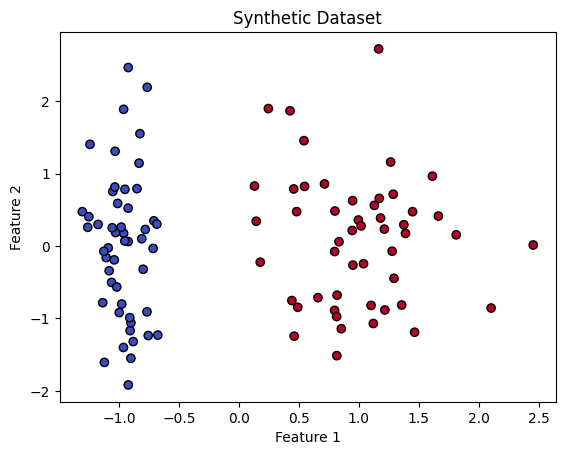

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(
    n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, random_state=42, n_informative=1, n_redundant=0, n_repeated=0
)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

---

##### **Step 3: Train an SVM Model**

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM classifier with a linear kernel
model = SVC(kernel='linear', C=1.0)  # 'C' is the regularization parameter
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 1.00


---

##### **Step 4: Visualize the Decision Boundary**

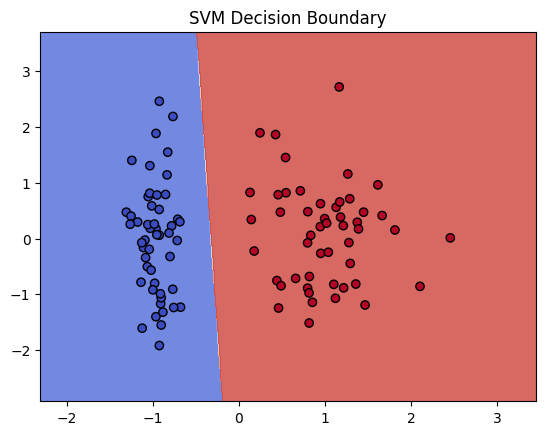

In [4]:
def plot_decision_boundary(X, y, model):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    # Predict labels for the grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title("SVM Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, model)

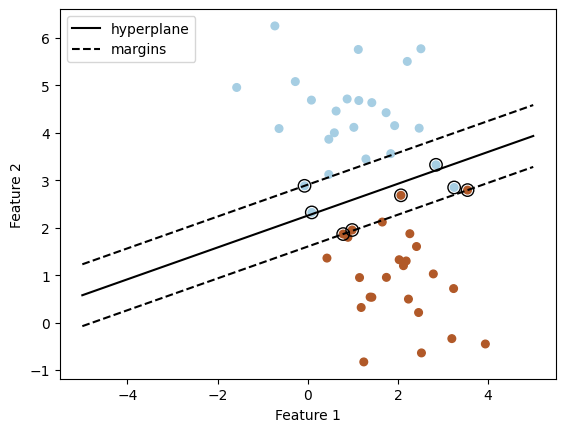

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# Generate a toy dataset
X, y = make_blobs(n_samples=50, centers=2, random_state=0)

# Create an SVM classifier
clf = SVC(kernel='linear')
clf.fit(X, y)

# Get the coefficients of the hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the hyperplane
plt.plot(xx, yy, 'k-', label='hyperplane')

# Plot the margins
yy_down = a * xx + (1 - clf.intercept_[0]) / w[1]
yy_up = a * xx + (-1 - clf.intercept_[0]) / w[1]
plt.plot(xx, yy_down, 'k--', label='margins')
plt.plot(xx, yy_up, 'k--')

# Support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

---

#### **Working with Non-linear Data**

For non-linear problems, we can use kernels like RBF:

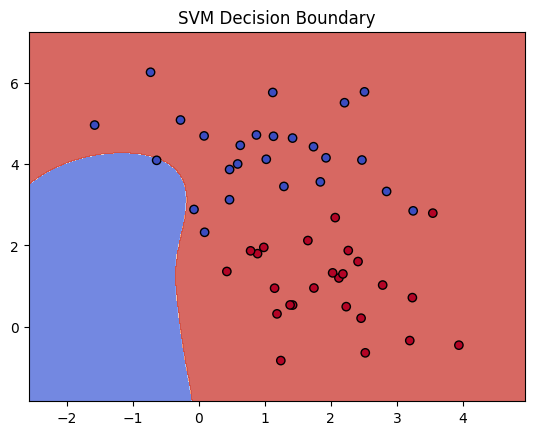

In [7]:
# Train SVM with RBF kernel
model_rbf = SVC(kernel='rbf', C=1.0, gamma=0.5)  # 'gamma' defines the influence of each point
model_rbf.fit(X_train, y_train)

# Visualize the decision boundary
plot_decision_boundary(X, y, model_rbf)

---

#### **When to Use SVM?**

1. **Small to Medium Datasets**: SVMs work best when the dataset size is not excessively large.
2. **High Dimensionality**: They excel when the number of features is large relative to samples.
3. **Clear Margin of Separation**: Ideal for problems with a clear boundary between classes.

---

#### **Advantages and Limitations**

**Advantages**:
- Effective in high dimensions.
- Customizable through kernels.
- Works well with limited samples.

**Limitations**:
- Not ideal for very large datasets due to computational cost.
- Sensitive to parameter tuning (e.g., kernel type, regularization).

---

#### **Extensions**

- **Multiclass Classification**: Use `One-vs-One` or `One-vs-Rest` strategies.
- **Regression**: SVMs also work for regression tasks using `SVR`.
- **Hyperparameter Tuning**: Use Grid Search (`GridSearchCV`) or Random Search (`RandomizedSearchCV`) to find the optimal parameters.

In [8]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.5, 1],
    'kernel': ['rbf', 'linear']
}

# Grid Search
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

print(f"Best Parameters: {grid.best_params_}")

Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


: 

---

